In [18]:
# libraries for data exploration and cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# loading customer and referrals info dataframe and displaying first rows

df_ci = pd.read_csv(r'C:\Users\jaime\Documents\GitHub\referrals_practice\datasets_raw\customer_info.csv')
df_ri = pd.read_csv(r'C:\Users\jaime\Documents\GitHub\referrals_practice\datasets_raw\referrals_info.csv')

In [20]:
df_ci.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [21]:
df_ri.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [22]:
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1699 non-null   int64 
 1   sign_up_date     1699 non-null   object
 2   sign_up_channel  1699 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ KB


In [23]:
df_ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   referral_date         1000 non-null   object
 1   referrer_customer_id  1000 non-null   int64 
 2   sign_up_customer_id   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [24]:
# Convert date columns to datetime()

df_ci.sign_up_date = pd.to_datetime(df_ci["sign_up_date"])
df_ci.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [25]:
df_ri.referral_date = pd.to_datetime(df_ri["referral_date"])
df_ri.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [26]:
# we first study the impact of the month in the number of referrals,
# both in total and in function of the referral channel in anticipation of the next question

df_ri['referral_month'] = df_ri.referral_date.dt.month
df_ri.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referral_month
0,2021-07-18,795,1771,7
1,2021-04-12,577,1510,4
2,2021-07-07,868,1858,7
3,2021-10-25,801,1778,10
4,2021-08-15,690,1637,8


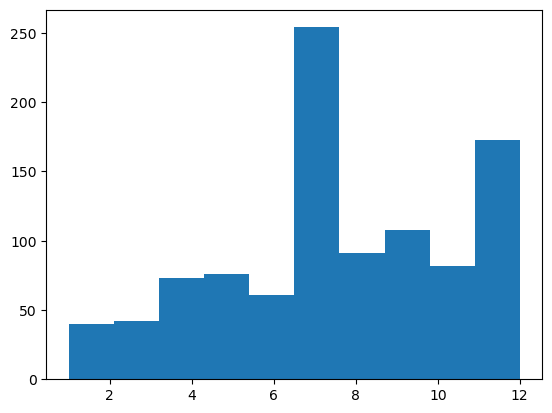

In [27]:
plt.hist(df_ri.referral_month)

plt.show()

We observe july and december are the months where the vast majorityof referrals take place

In [28]:
df_ci.sign_up_channel.unique()

array(['Price Comparison Website', 'Referral', 'Bulb Website'],
      dtype=object)

In [29]:
# We add the columns referrer sign_up_channel and referrer_sign_up_date to df_ri

df = df_ri.merge(df_ci[['customer_id','sign_up_date', 'sign_up_channel']],
                 how='left', 
                left_on = 'referrer_customer_id',
                right_on = 'customer_id')

df = df.rename(columns = {
    'sign_up_date' : 'referrer_sign_up_date', 
    'sign_up_channel' : 'referrer_sign_up_channel'
})

df = df.drop(columns=['customer_id'])
df = df.dropna()

df.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referral_month,referrer_sign_up_date,referrer_sign_up_channel
0,2021-07-18,795,1771,7,2021-03-03,Price Comparison Website
1,2021-04-12,577,1510,4,2021-03-28,Price Comparison Website
2,2021-07-07,868,1858,7,2021-03-07,Bulb Website
3,2021-10-25,801,1778,10,2021-04-30,Referral
4,2021-08-15,690,1637,8,2021-07-29,Price Comparison Website


In [30]:
# We add a column with the number of days from the referrer's signup to the referral

df['ref_delay'] = (df.referral_date - df.referrer_sign_up_date).dt.days
df.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referral_month,referrer_sign_up_date,referrer_sign_up_channel,ref_delay
0,2021-07-18,795,1771,7,2021-03-03,Price Comparison Website,137
1,2021-04-12,577,1510,4,2021-03-28,Price Comparison Website,15
2,2021-07-07,868,1858,7,2021-03-07,Bulb Website,122
3,2021-10-25,801,1778,10,2021-04-30,Referral,178
4,2021-08-15,690,1637,8,2021-07-29,Price Comparison Website,17


In [31]:
df.ref_delay.describe()

count    832.000000
mean     113.653846
std      112.996269
min        0.000000
25%       24.000000
50%       83.500000
75%      167.250000
max      700.000000
Name: ref_delay, dtype: float64

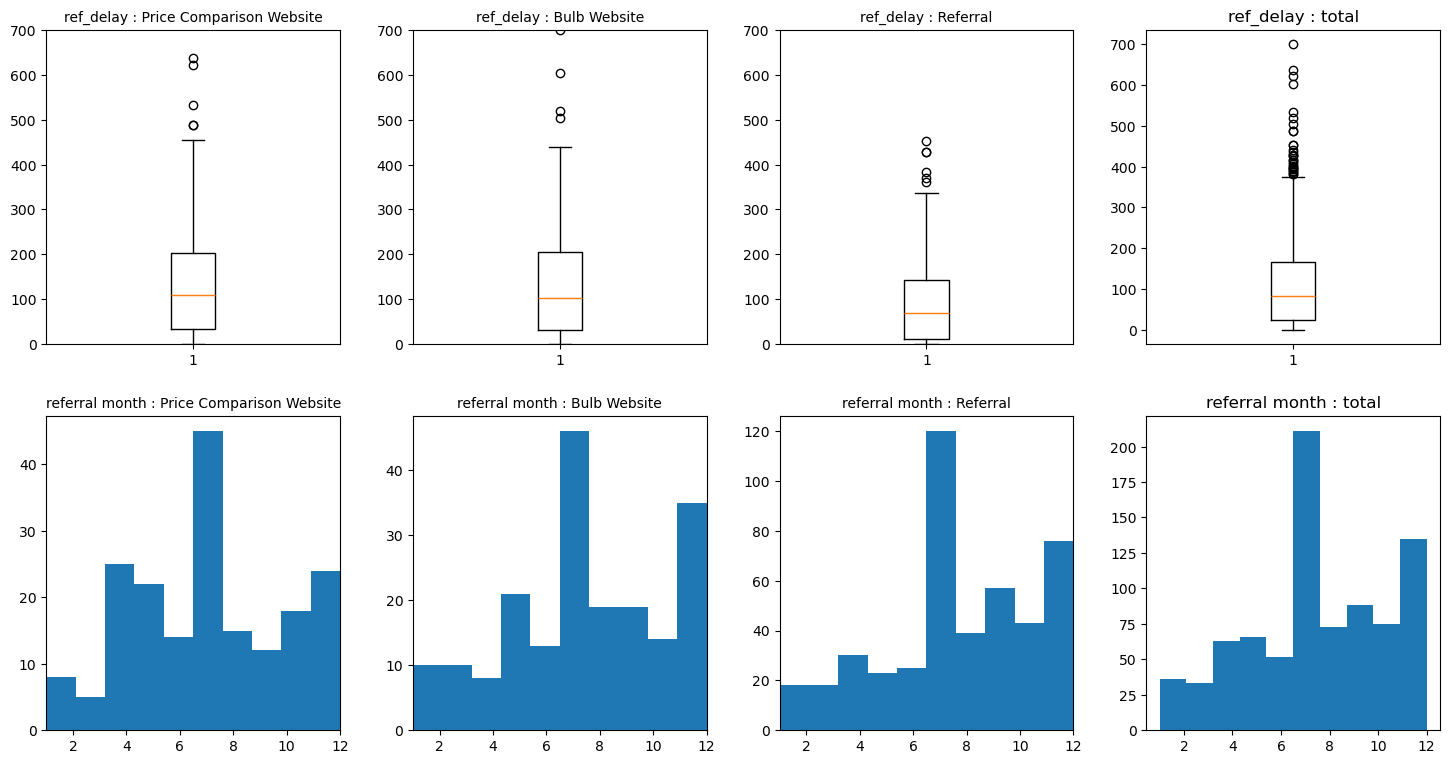

In [45]:
# We plot the referral delay for each channel and total, and the referral hist month
fig, axs = plt.subplots(2, 4, figsize=(15, 8)) 
ypos = 0


ref_delay_min, ref_delay_max = df['ref_delay'].min(), df['ref_delay'].max()
referral_month_min, referral_month_max = df['referral_month'].min(), df['referral_month'].max()

for channel in df.referrer_sign_up_channel.unique():
    
    # Boxplot for 'ref_delay'
    axs[0, ypos].boxplot(df['ref_delay'][df.referrer_sign_up_channel == channel])
    axs[0, ypos].set_ylim(ref_delay_min, ref_delay_max)  
    axs[0, ypos].set_title('ref_delay : ' + channel, fontsize=10)
    
    # Histogram for 'referral_month'
    axs[1, ypos].hist(df['referral_month'][df.referrer_sign_up_channel == channel], bins=10)
    axs[1, ypos].set_xlim(referral_month_min, referral_month_max)  
    axs[1, ypos].set_title('referral month : ' + channel, fontsize=10)
    
    ypos += 1
    
axs[0,3].boxplot(df['ref_delay'])
axs[1,3].hist(df['referral_month'])
axs[0,3].set_title('ref_delay : total')
axs[1,3].set_title('referral month : total')

plt.tight_layout(pad=2.0) 
plt.show()






The yearly behaviour is similar for every sign up channel. 